# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [51]:
# Set the API base URL
url =f"https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []
units='metric'
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_weather =requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity =  city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 2 of Set 1 | uchiza
City not found. Skipping...
Processing Record 3 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 4 of Set 1 | kapustin yar
City not found. Skipping...
Processing Record 5 of Set 1 | soe
City not found. Skipping...
Processing Record 6 of Set 1 | adamstown
City not found. Skipping...
Processing Record 7 of Set 1 | saipan
City not found. Skipping...
Processing Record 8 of Set 1 | hawaiian paradise park
City not found. Skipping...
Processing Record 9 of Set 1 | papatowai
City not found. Skipping...
Processing Record 10 of Set 1 | berdigestyakh
City not found. Skipping...
Processing Record 11 of Set 1 | qamdo
City not found. Skipping...
Processing Record 12 of Set 1 | petropavlovsk-kamchatsky
City not found. Skipping...
Processing Record 13 of Set 1 | port saint john's
City not found. Skipping...
Processing 

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

Series([], dtype: int64)

In [18]:
# Display sample data
city_data_df.head()

""


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/jennyposso/Desktop/Starter_Code 6/output_data.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

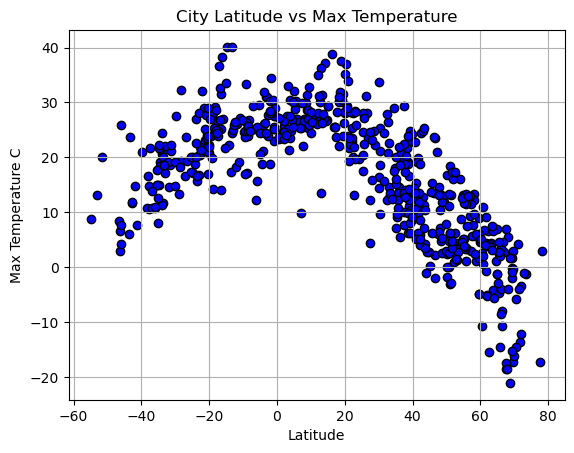

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"] , marker="o" , facecolor="b" , edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature C")
plt.title("City Latitude vs Max Temperature")
plt.grid()
plt.style.use('fast')


# Save the figure
plt.savefig("/Users/jennyposso/Desktop/Starter_Code 6/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

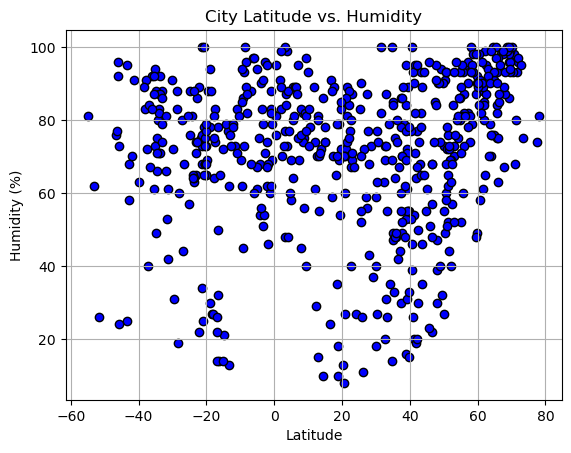

In [14]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"] , marker="o" , facecolor="b" , edgecolor="k")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("/Users/jennyposso/Desktop/Starter_Code 6/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

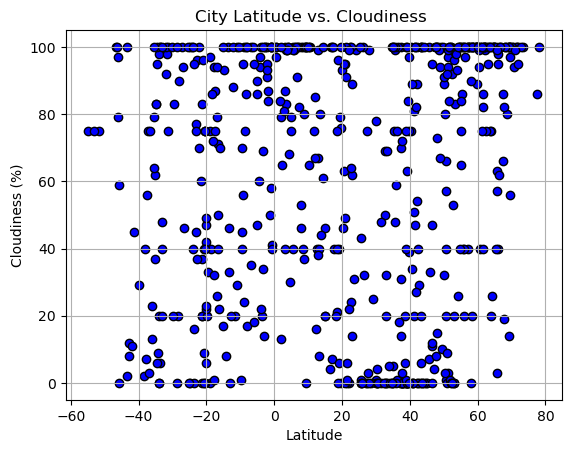

In [26]:

# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"] , marker="o" , facecolor="b" , edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ")
plt.grid()

# Save the figure
plt.savefig("/Users/jennyposso/Desktop/Starter_Code 6/output_data/Fig3.png")

# Show plot
plt.show()




#### Latitude vs. Wind Speed Plot

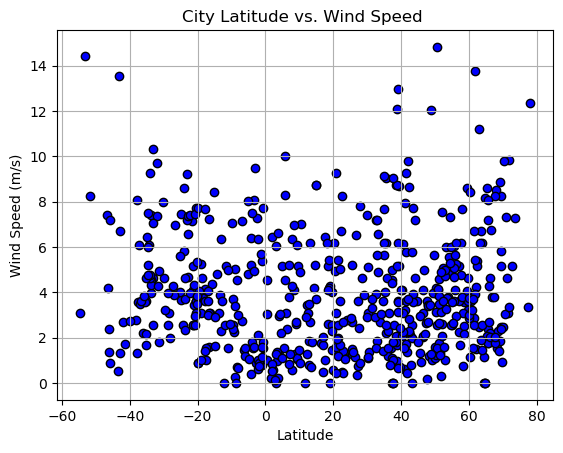

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"] , marker="o" , facecolor="b" , edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ")
plt.grid()

# Save the figure
plt.savefig("/Users/jennyposso/Desktop/Starter_Code 6/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
def regression():
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
    regress_values=x_values * slope + intercept
    plt.scatter(x_values,y_values ,label='Data Points')
    plt.plot(x_values, regress_values,"r-",label='Regression Line')
    line_eq="y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))
    plt.annotate(line_eq,(0,12),fontsize=12,color="black")
    print(f'The r-value is : {rvalue}')
    

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City_ID,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.8462548186825364


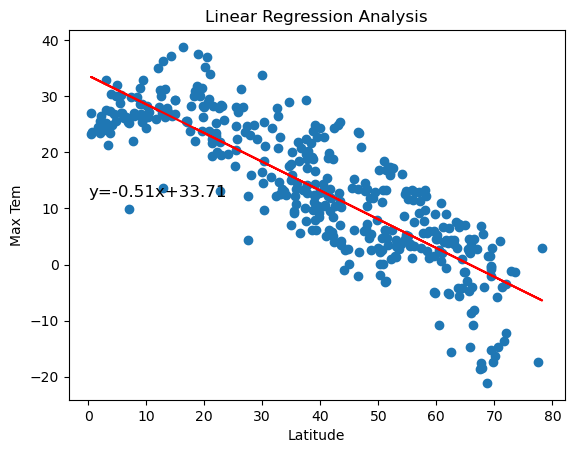

In [55]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Max Tem')
plt.title('Linear Regression Analysis')
plt.show()




The r-value is : 0.6419546065421801


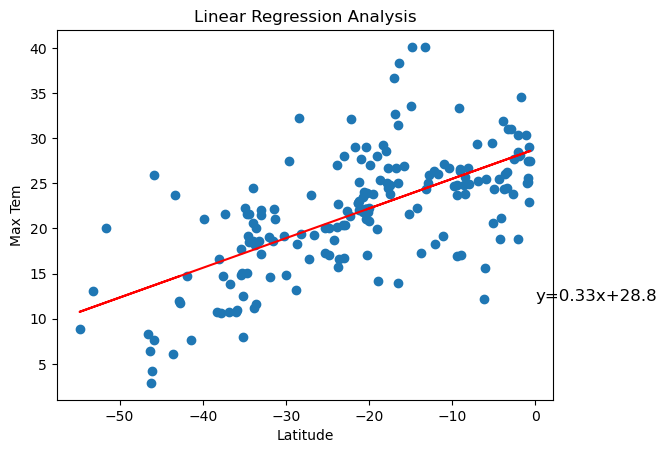

In [56]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Max Tem')
plt.title('Linear Regression Analysis')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.2385317912939407


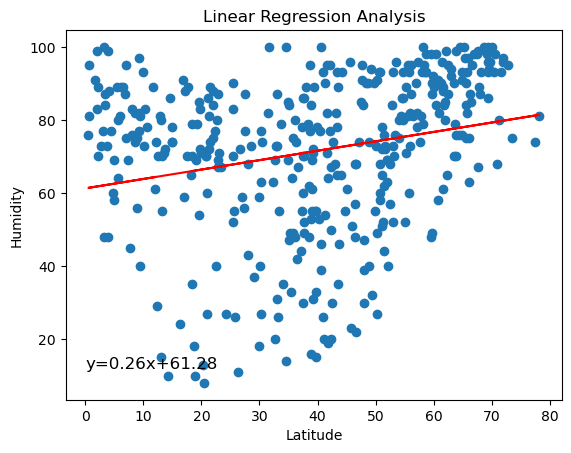

In [57]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression Analysis')
plt.show()

The r-value is : 0.016759316950056818


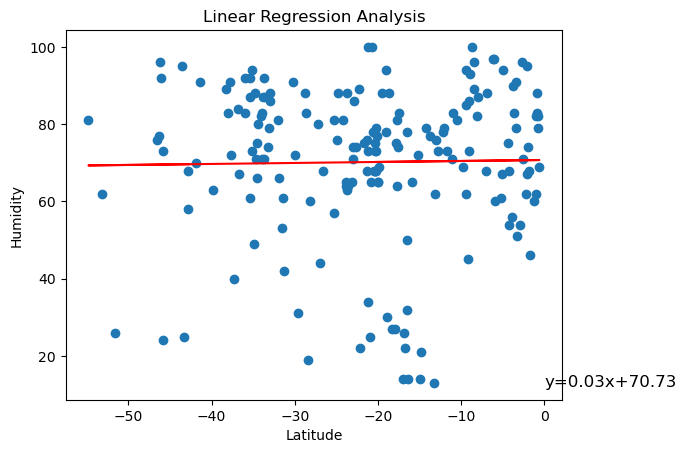

In [58]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression Analysis')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.155004893876971


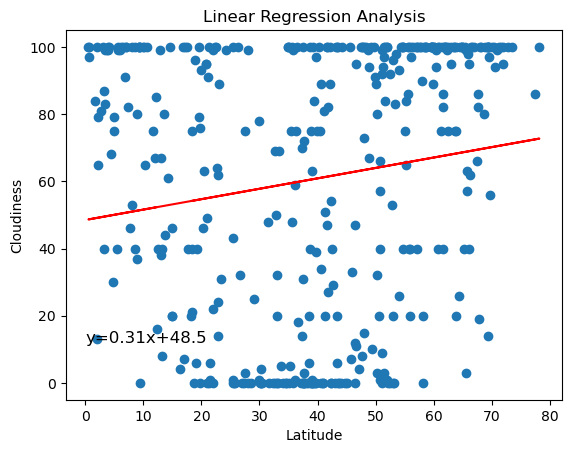

In [59]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression Analysis')

plt.show()

The r-value is : 0.14341322916643243


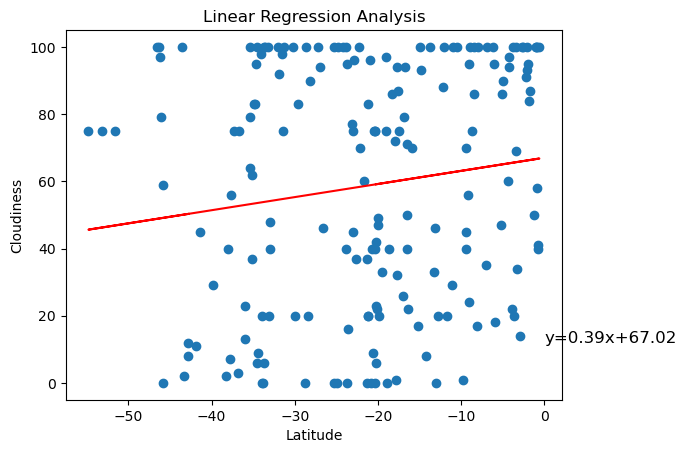

In [60]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression Analysis')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.17434667290903338


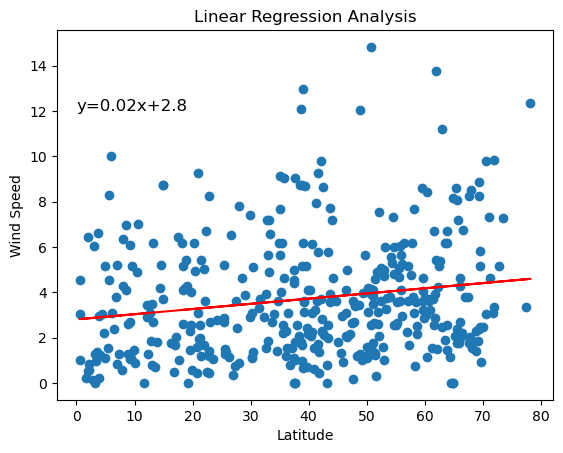

In [61]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression Analysis')
plt.show()

The r-value is : -0.24947753546264592


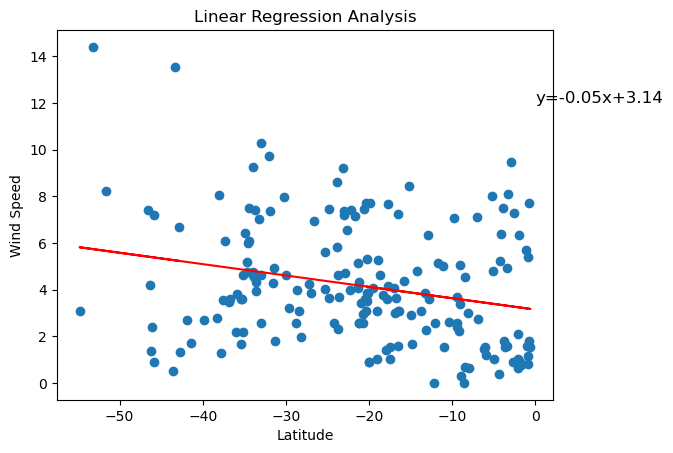

In [63]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression Analysis')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# NO CORRELATION DO TO THE R VALUE  BEING = -0.2